In [1]:
import pandas as pd
import numpy as np

# 1) Delivery_time -> Predict delivery time using sorting time  
# 2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

## 1) using Delivery_time.csv

In [2]:
delivery=pd.read_csv("F:/ExcelR workings/Assignments/Simple Linear Regression/delivery_time.csv")

In [3]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
Delivery = delivery.rename({'Delivery Time': 'DT','Sorting Time': 'ST'},axis=1)

In [6]:
import seaborn as sns

C:\Users\sanjaysagar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

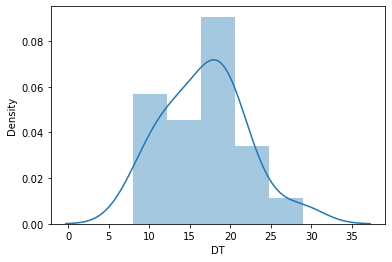

In [7]:
sns.distplot(Delivery['DT'])

C:\Users\sanjaysagar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

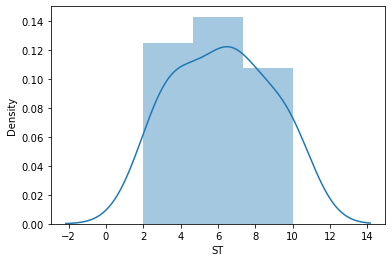

In [8]:
sns.distplot(Delivery['ST'])

In [9]:
delivery.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [10]:
# It is clear that both variable are symmetric and also dont have outliers to see the above graph and skewness values.

In [11]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [12]:
#There is strongly positive correlation between Delivery Time and Sorting Time.

In [13]:
import statsmodels.formula.api as smf

In [14]:
model=smf.ols('DT~ST',data=Delivery).fit()

In [15]:
#Coefficients(beta not and beta 1)
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [16]:
# t and p values
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [17]:
# As P value<Alpha(0.05) so the Beta-not is not zero.

In [18]:
print(model.rsquared,model.rsquared_adj)

0.6822714748417231 0.6655489208860244


In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.98e-06
Time:                        23:11:19   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model is not good enough.

## Using Transformation Techniques on the same data

In [19]:
Delivery1=Delivery.copy()

In [20]:
Delivery['log_ST']=np.log(Delivery['ST'])
Delivery['log_DT']=np.log(Delivery['DT'])
Delivery.head()

,DT,ST,log_ST,log_DT
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296


In [21]:
model1=smf.ols('log_DT~log_ST',data=Delivery).fit()

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_DT   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.60e-07
Time:                        22:46:47   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
log_ST         0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
Delivery['sqrt_ST']=np.sqrt(Delivery['ST'])
Delivery['sqrt_DT']=np.sqrt(Delivery['DT'])
Delivery.head()

,DT,ST,log_ST,log_DT,sqrt_ST,sqrt_DT
0,21.00,10,2.302585,3.044522,3.162278,4.582576
1,13.50,4,1.386294,2.602690,2.000000,3.674235
2,19.75,6,1.791759,2.983153,2.449490,4.444097
3,24.00,9,2.197225,3.178054,3.000000,4.898979
4,29.00,10,2.302585,3.367296,3.162278,5.385165


In [24]:
model2=smf.ols('sqrt_DT~sqrt_ST',data=Delivery).fit()

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sqrt_DT   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Wed, 26 May 2021   Prob (F-statistic):           8.48e-07
Time:                        22:46:47   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
sqrt_ST        1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
Delivery['exp_ST']=np.exp(-Delivery['ST'])
Delivery['exp_DT']=np.exp(-Delivery['DT'])
Delivery.head()

,DT,ST,log_ST,log_DT,sqrt_ST,sqrt_DT,exp_ST,exp_DT
0,21.00,10,2.302585,3.044522,3.162278,4.582576,0.000045,7.582560e-10
1,13.50,4,1.386294,2.602690,2.000000,3.674235,0.018316,1.370959e-06
2,19.75,6,1.791759,2.983153,2.449490,4.444097,0.002479,2.646574e-09
3,24.00,9,2.197225,3.178054,3.000000,4.898979,0.000123,3.775135e-11
4,29.00,10,2.302585,3.367296,3.162278,5.385165,0.000045,2.543666e-13


In [27]:
model3=smf.ols('exp_DT~exp_ST', data=Delivery).fit()

In [28]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 exp_DT   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     78.77
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.47e-08
Time:                        22:46:47   Log-Likelihood:                 187.70
No. Observations:                  21   AIC:                            -371.4
Df Residuals:                      19   BIC:                            -369.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.365e-05   8.29e-06     -1.646      0.116    -3.1e-05    3.71e-06
exp_ST         0.0021      0.000      8.875      0.000       0.002       0.003
==============================================================================
Omnibus:                       10.040   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.171
Skew:                          -1.061   Prob(JB):                       0.0168
Kurtosis:                       5.200   Cond. No.                         31.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
Delivery['sq_inv_ST']=1/(Delivery['ST']*Delivery['ST'])
Delivery['sq_inv_DT']=1/(Delivery['DT']*Delivery['DT'])
Delivery.head()

,DT,ST,log_ST,log_DT,sqrt_ST,sqrt_DT,exp_ST,exp_DT,sq_inv_ST,sq_inv_DT
0,21.00,10,2.302585,3.044522,3.162278,4.582576,0.000045,7.582560e-10,0.010000,0.002268
1,13.50,4,1.386294,2.602690,2.000000,3.674235,0.018316,1.370959e-06,0.062500,0.005487
2,19.75,6,1.791759,2.983153,2.449490,4.444097,0.002479,2.646574e-09,0.027778,0.002564
3,24.00,9,2.197225,3.178054,3.000000,4.898979,0.000123,3.775135e-11,0.012346,0.001736
4,29.00,10,2.302585,3.367296,3.162278,5.385165,0.000045,2.543666e-13,0.010000,0.001189


In [34]:
model4=smf.ols('sq_inv_DT~sq_inv_ST',data=Delivery).fit()

In [35]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sq_inv_DT   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     121.0
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.11e-09
Time:                        22:54:10   Log-Likelihood:                 110.29
No. Observations:                  21   AIC:                            -216.6
Df Residuals:                      19   BIC:                            -214.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0019      0.000      4.949      0.000       0.001       0.003
sq_inv_ST      0.0572      0.005     11.000      0.000       0.046       0.068
==============================================================================
Omnibus:                        5.921   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                3.817
Skew:                           0.996   Prob(JB):                        0.148
Kurtosis:                       3.631   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### After using some transformation techniques we can say model4 is the best one as per R squared values.

## 2) Using Salary_Data.csv

In [40]:
salary=pd.read_csv('F:/ExcelR workings/Assignments/Simple Linear Regression/Salary_Data.csv')

In [41]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [42]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [43]:
Salary = salary.rename({'YearsExperience': 'Exp'},axis=1)

In [44]:
Salary.head()

,Exp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


C:\Users\sanjaysagar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Exp', ylabel='Density'>

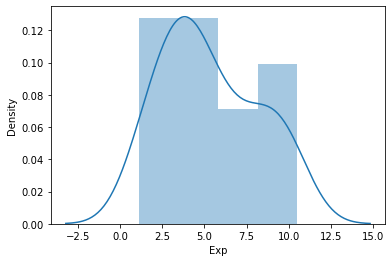

In [45]:
sns.distplot(Salary['Exp'])

C:\Users\sanjaysagar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

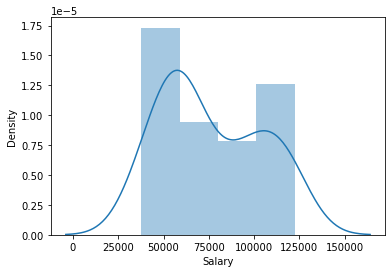

In [46]:
sns.distplot(Salary['Salary'])

In [47]:
Salary.skew(axis=0,skipna=True)

Exp       0.37956
Salary    0.35412
dtype: float64

In [48]:
# It is clear that both variable are symmetric and also dont have outliers to see the above graph and skewness values.

In [49]:
Model_2=smf.ols('Salary~Exp',data=Salary).fit()

<AxesSubplot:xlabel='Salary', ylabel='Exp'>

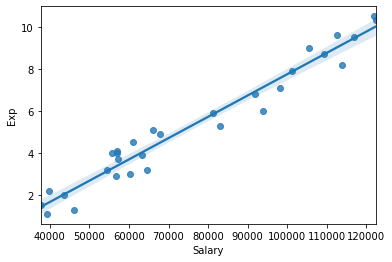

In [50]:
sns.regplot(y='Exp',x='Salary',data=Salary)

In [51]:
#Coefficients(beta not and beta 1)
Model_2.params

Intercept    25792.200199
Exp           9449.962321
dtype: float64

In [52]:
# t and p values
print(Model_2.tvalues, '\n', Model_2.pvalues)

Intercept    11.346940
Exp          24.950094
dtype: float64 
 Intercept    5.511950e-12
Exp          1.143068e-20
dtype: float64


In [53]:
# As P value<Alpha(0.05) so the Beta-not is not zero.

In [54]:
print(Model_2.rsquared,Model_2.rsquared_adj)

0.9569566641435086 0.9554194021486339


In [56]:
Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.14e-20
Time:                        23:14:08   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model is Best one so no need of transformation